# Data Analysis

### Info
This log is part of the experiment 20139026 at beamline DiProi at Fermi/Trieste (Oct.2017).  

Uses: /src/data_tools.py and /src/fit_tools.py

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from scipy import interpolate
import h5py
import sys

sys.path.insert(0, '../src/')
from data_tools import *
from fit_tools import *

### Load data

costants and parameters

In [2]:
run = 21
t0 = 136.35
c = 299792458 #m/s
i0_thr = 2e5
n_bins = 1626

discover and sort energy folders

In [3]:
base_path = '/Volumes/FERMI_2017/DATA/XAS%03d/' % run
folders,tmp = discover_files(base_path)

energies = []
e_folders = []
for i in range(len(folders)):
    if folders[i][:2]=='E2':
        e = float('%s.%s'%(folders[i][1:4],folders[i][5:7]))
        energies.extend([e])
        e_folders.extend([folders[i]])
n_energies = len(energies)
energies_sorted = np.sort(energies)
e_folders_sorted = [x for _,x in sorted(zip(energies,e_folders))]

Load data: For each shots are loaded 
* the FEL intensity (i0)
* the XAS intensity
* the delay time  
* the photon energy (average)

In [7]:
FEL_int  = [] 
t_delay  = [] 
mean_E   = [] 
delays   = []
XES_spec  = np.zeros([n_energies,n_bins])

# loop over energies and delay times and load
for i in range(n_energies):
    load_path = base_path+e_folders_sorted[i]+'/work/'
    tmp,file_names = discover_files(load_path)
    print 'E:%d/%d - %s '%(i+1,n_energies,e_folders_sorted[i])
    XES_tmp = np.zeros([len(file_names),n_bins])
    for j in range(len(file_names)):
        h5file = h5py.File(load_path+file_names[j], 'r')
        t   = h5file['/LASER/delay'].value
        i0  = np.array(h5file['/FEL/i0'].value)
        n_shots = len(i0)
        XES = np.array(h5file['/XES/spectrum'].value,dtype=float)
        XES_tmp[j] = np.average(XES,axis=0)

        FEL_int.extend(i0)
        mean_E.extend(np.ones(n_shots)*energies_sorted[i])
        t_delay.extend(np.ones(n_shots)*t)
        delays.extend([t])
    XES_spec[i] = np.average(XES_tmp,axis=0)
            
FEL_int  = np.array(FEL_int) 
#XES_int  = np.array(XAS_int)
t_delay  = np.array(t_delay)
mean_E   = np.array(mean_E)
delays   = np.array(delays)
delays= np.unique(np.sort(delays[delays>0]))

E:1/20 - E285p63eV_Ver 
E:2/20 - E286p12eV_Ver 
E:3/20 - E286p36eV_Ver 
E:4/20 - E286p60eV_Ver 
E:5/20 - E286p97eV_Ver 
E:6/20 - E287p20eV_Ver 
E:7/20 - E287p50eV_Ver 
E:8/20 - E287p80eV_Ver 
E:9/20 - E288p10eV_Ver 
E:10/20 - E288p37eV_Ver 
E:11/20 - E288p69eV_Ver 
E:12/20 - E289p00eV_Ver 
E:13/20 - E289p30eV_Ver 
E:14/20 - E289p60eV_Ver 
E:15/20 - E289p90eV_Ver 
E:16/20 - E290p19eV_Ver 
E:17/20 - E290p49eV_Ver 
E:18/20 - E290p81eV_Ver 
E:19/20 - E291p00eV_Ver 
E:20/20 - E291p50eV_Ver 


### RIXS signal

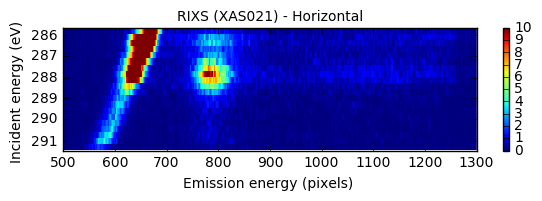

In [8]:
x1,x2 = 500,1301

plt.figure(figsize=[6,2])
plt.imshow(XES_spec[:,x1:x2],aspect='auto',interpolation='None',vmax=10)
fE = interpolate.interp1d(energies_sorted,np.arange(n_energies))
E_ticks =np.arange(286,292)
y_ticks = fE(E_ticks)
plt.yticks(y_ticks,E_ticks)
plt.ylabel(r'Incident energy (eV) ',size=10)
plt.xlabel(r'Emission energy (pixels) ',size=10)
plt.xticks(np.arange(0,x2-x1,100),np.arange(0,x2-x1,100)+x1)

plt.colorbar()
plt.tight_layout()
plt.title('RIXS (XAS%03d) - Horizontal'%run,size=10)
plt.savefig('/Users/fivos/Desktop/RIXS_%03d_Hor.png'%run,dpi=300)

plt.show()